In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('C:/Users/dell/Documents/Codsoft/Task 3/Churn_Modelling.csv', header = 0)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.size

140000

In [7]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [8]:
df.isnull().values.any()

False

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [11]:
print(df["Geography"].unique())
print(df["Gender"].unique())
print(df["NumOfProducts"].unique())
print(df["HasCrCard"].unique())
print(df["IsActiveMember"].unique())
print(df["Exited"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [14]:
df.iloc[0:5]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.loc[1]

RowNumber                  2
CustomerId          15647311
Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
Name: 1, dtype: object

In [16]:
df.loc[0:,"CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

Data Visualization

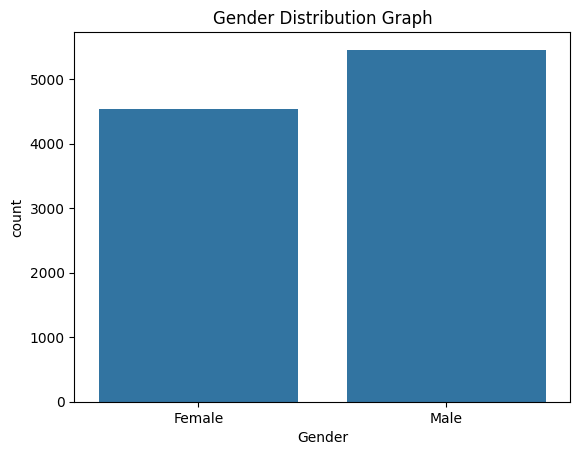

In [17]:
sns.countplot(x='Gender', data=df)
mat.title('Gender Distribution Graph')
mat.show()

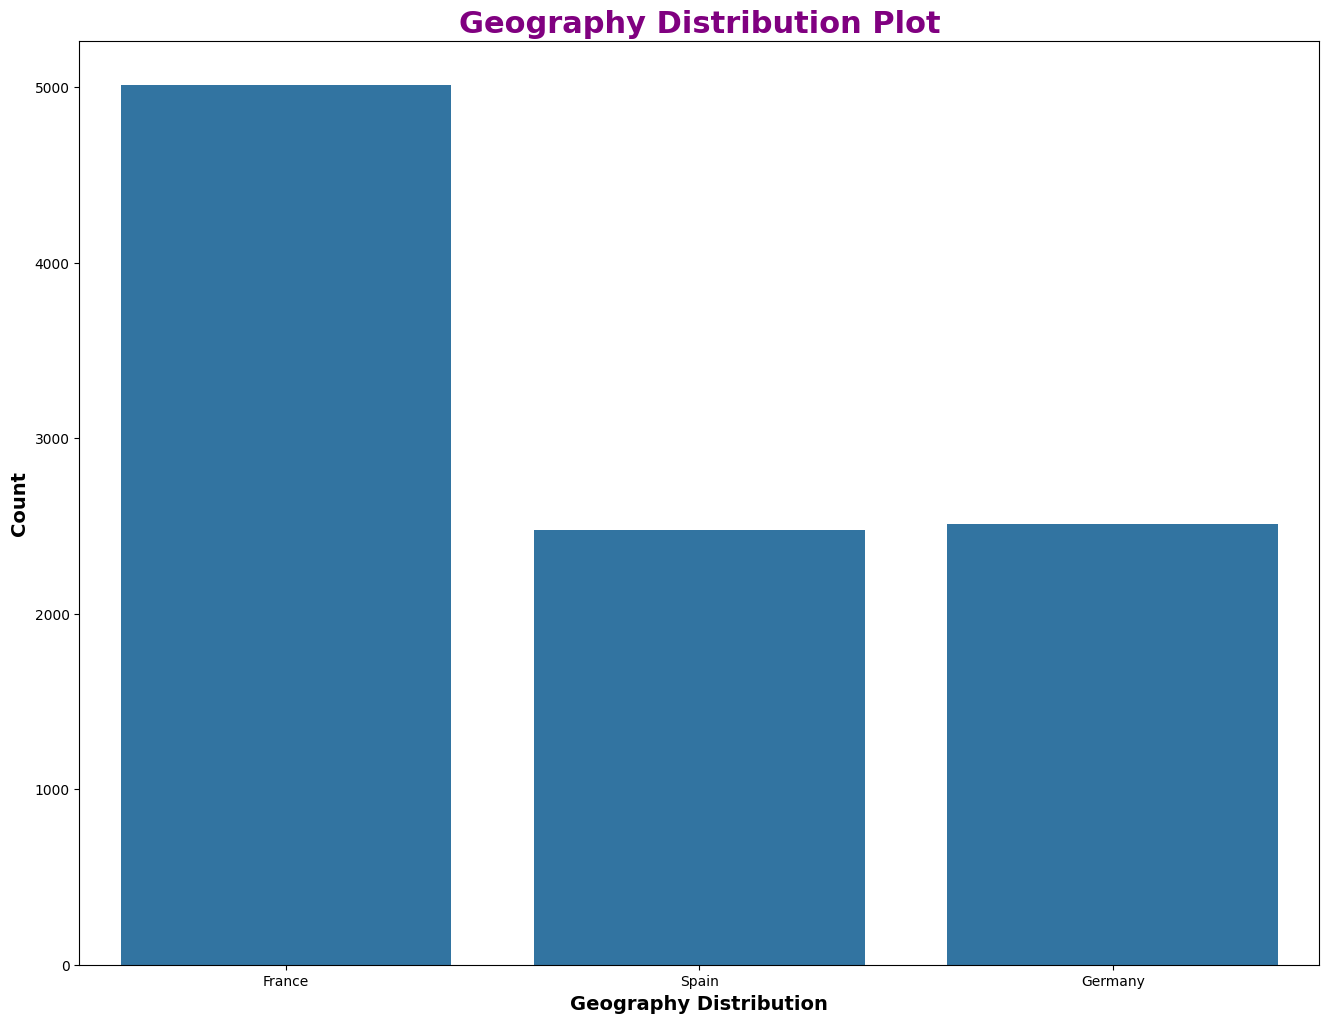

In [18]:
mat.figure(figsize=(16,12))
sns.countplot(x='Geography', data=df)
mat.xlabel('Geography Distribution', fontsize=14,fontweight="bold")
mat.ylabel('Count',fontsize=14,fontweight="bold")
mat.title('Geography Distribution Plot',fontsize=22, fontweight="bold", color = "purple")
mat.show()

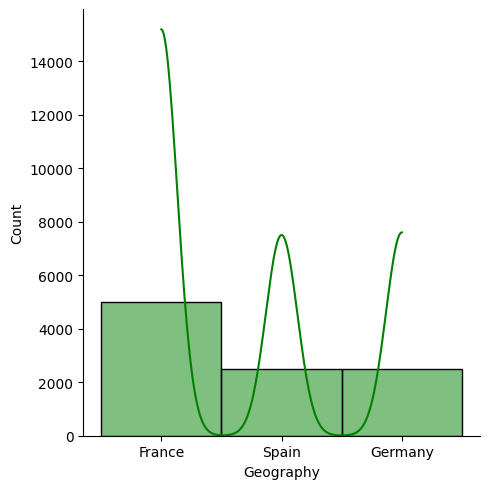

In [19]:
sns.displot(df.Geography, kde =True, color = "green")

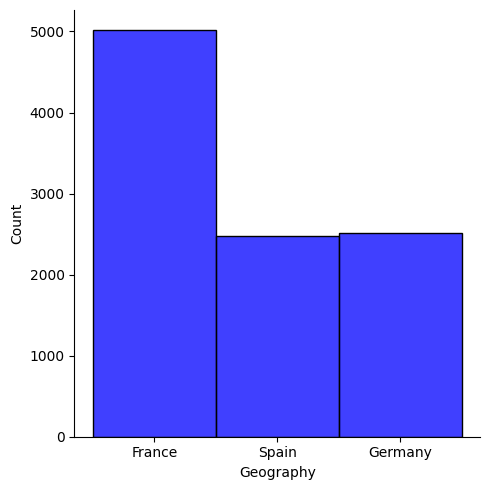

In [20]:
sns.displot(df.Geography, color = "blue")

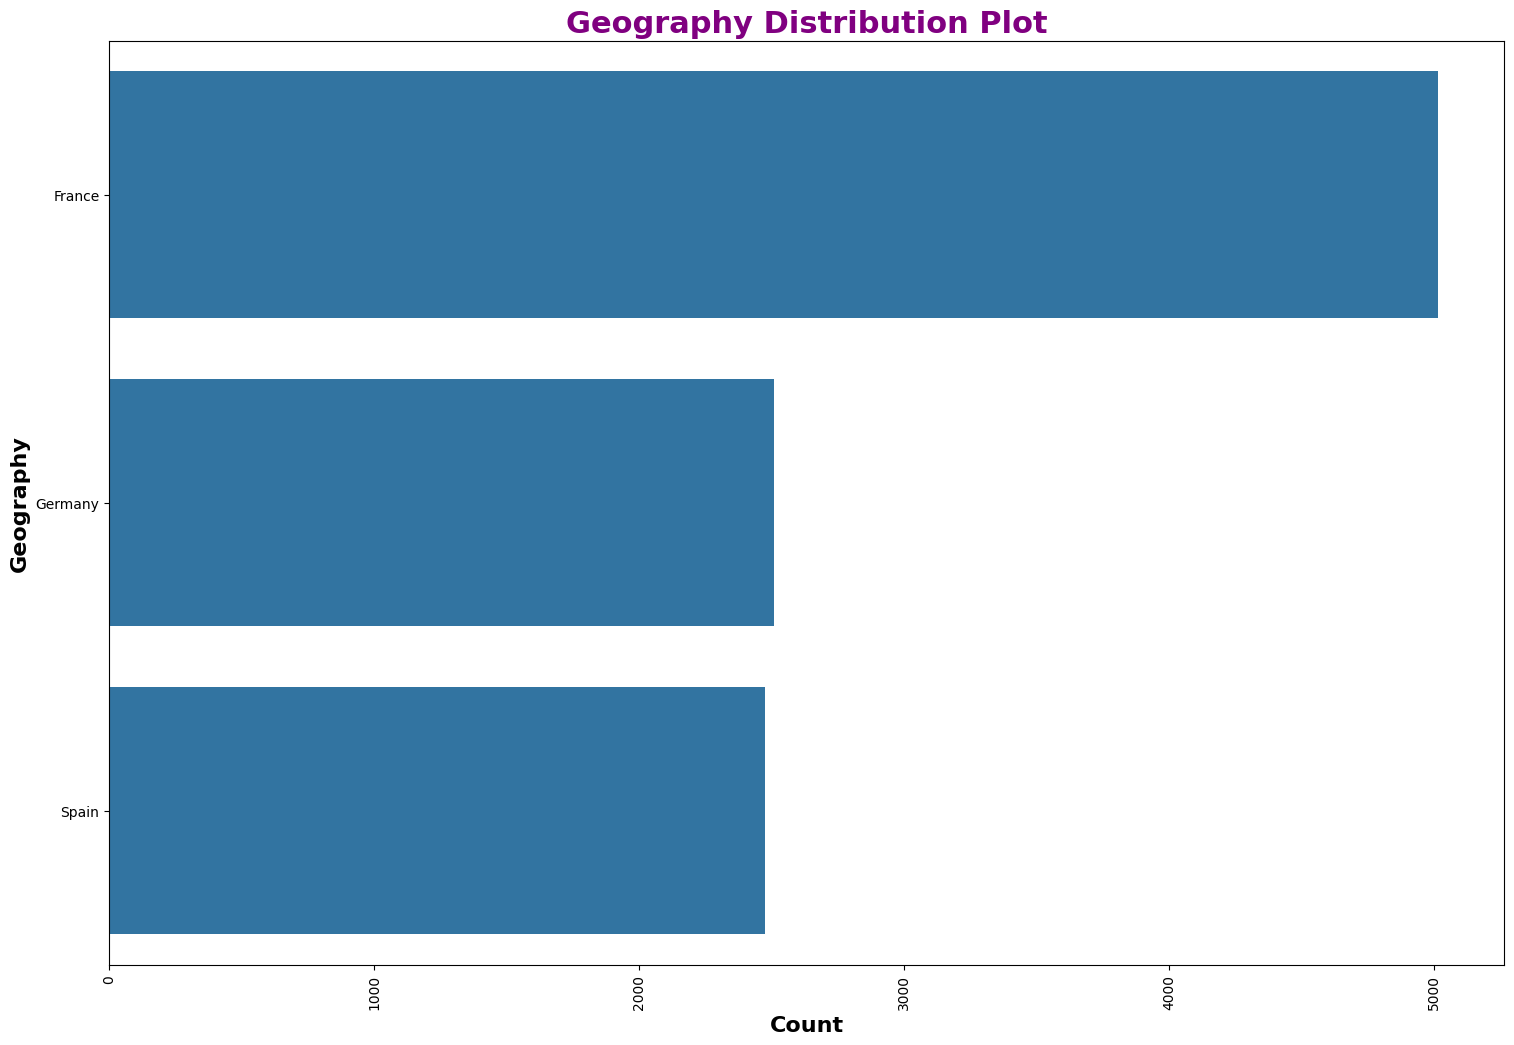

In [21]:
mat.figure(figsize = (18,12))
count_1 = df.Geography.value_counts()
sns.barplot(x = count_1, y = count_1.index, orient = 'h')
mat.xlabel('Count',fontsize=16,fontweight="bold")
mat.ylabel('Geography',fontsize=16,fontweight="bold")
mat.title('Geography Distribution Plot',fontsize=22, fontweight="bold", color = "purple")
mat.xticks(rotation=90)
mat.show()

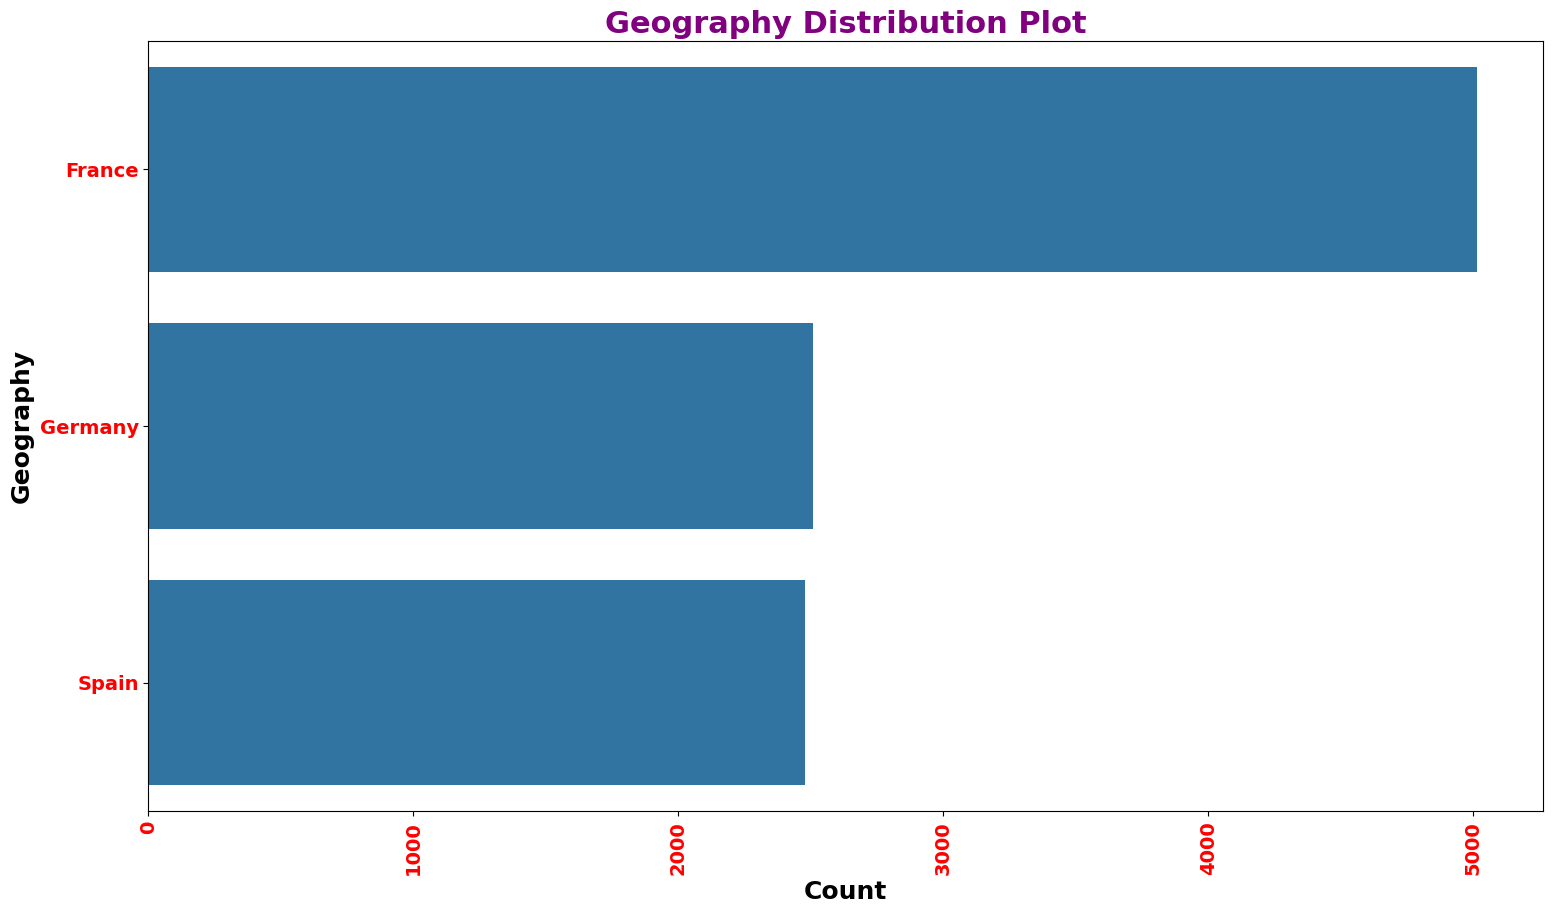

In [22]:
mat.figure(figsize = (18,10))
count_1 = df.Geography.value_counts()
sns.barplot(x = count_1, y = count_1.index, orient = 'h')
mat.xlabel('Count', fontsize = 18, fontweight = 'bold')
mat.ylabel('Geography', fontsize = 18, fontweight = 'bold')
mat.title('Geography Distribution Plot', fontsize = 22, fontweight = 'bold', color = 'purple')
mat.xticks(rotation=90, fontsize = 14, fontweight = 'bold', color = 'red')
mat.yticks(fontsize = 14, fontweight = 'bold', color = 'red')
mat.show()

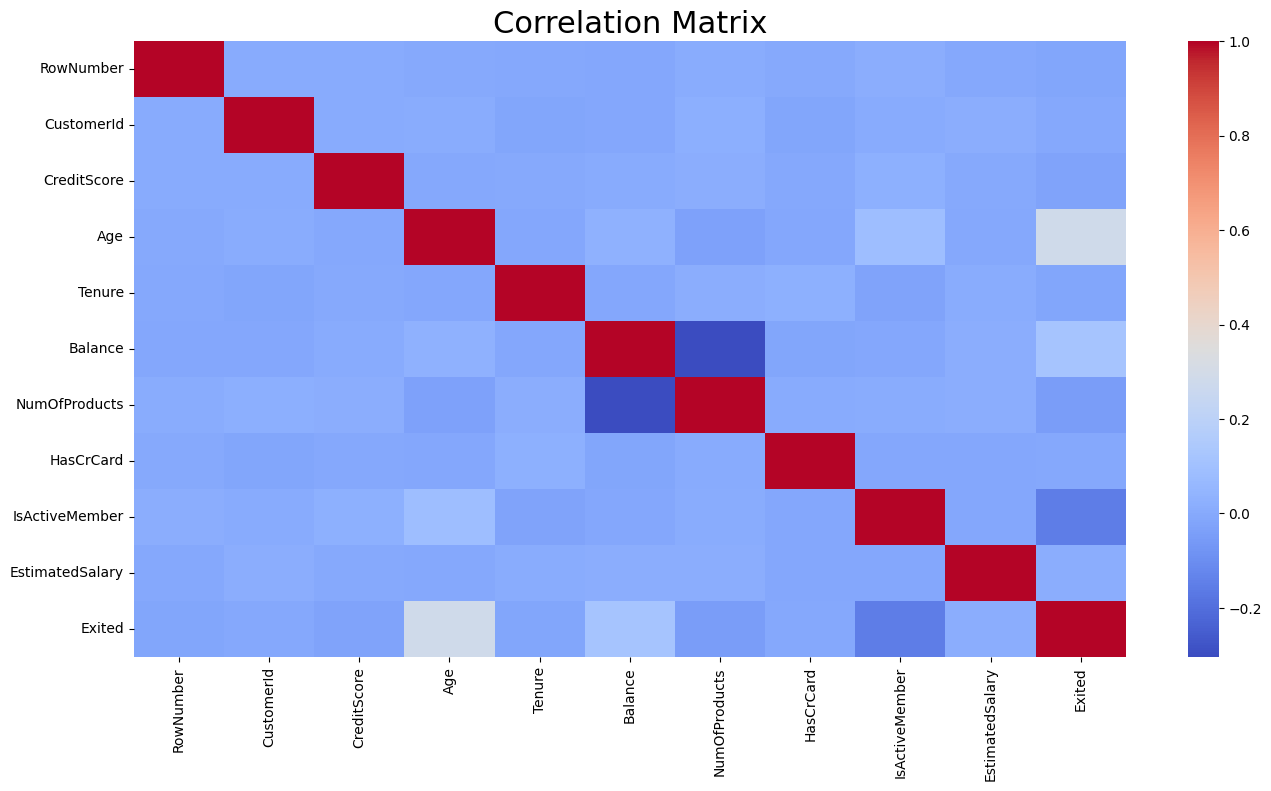

In [23]:
num_cols = df.select_dtypes(include=[np.number])
correlation_matrix = num_cols.corr()
mat.figure(figsize = (16,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = False,  fmt=".2f")
mat.title("Correlation Matrix", fontsize=22)
mat.show()

PreProcessing the data

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df.drop(labels = ["RowNumber","CustomerId", "Surname"], axis = 1, inplace=True)

In [26]:
df = pd.get_dummies(df, drop_first = True)

In [27]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [28]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

Training Logistic Regression Model

In [31]:
lr_model = LogisticRegression()

In [32]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [33]:
lr_prediction = lr_model.predict(x_test)

In [34]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_prediction))
print(classification_report(y_test, lr_prediction))
print("Accuracy: ", accuracy_score(y_test, lr_prediction))
print("r2_Score: ", r2_score(y_test, lr_prediction))
print("Precision_score: ", precision_score(y_test, lr_prediction))
print("Recall_score: ", recall_score(y_test, lr_prediction))
print("f1_score: ", f1_score(y_test, lr_prediction))

Logistic Regression Model:
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy:  0.811
r2_Score:  -0.19705296959390473
Precision_score:  0.5524475524475524
Recall_score:  0.2010178117048346
f1_score:  0.2947761194029851


Train Random Forests Model

In [35]:
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)

In [36]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [37]:
rf_prediction = rf_model.predict(x_test)

In [38]:
print("Random Forest Model:")
print(confusion_matrix(y_test, rf_prediction))
print(classification_report(y_test, rf_prediction))
print("Accuracy: ", accuracy_score(y_test, rf_prediction))
print("r2_Score: ", r2_score(y_test, rf_prediction))
print("Precision_score: ", precision_score(y_test, rf_prediction))
print("Recall_score: ", recall_score(y_test, rf_prediction))
print("f1_score: ", f1_score(y_test, rf_prediction))

Random Forest Model:
[[1547   60]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy:  0.8655
r2_Score:  0.1481289713736499
Precision_score:  0.7540983606557377
Recall_score:  0.4681933842239186
f1_score:  0.5777080062794349


Train Gradient Boosting Model

In [39]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.02, max_depth = 1, random_state=42)

In [40]:
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000,
                           random_state=42)

In [41]:
gb_prediction = gb_model.predict(x_test)

In [42]:
print("Gradient Boosting Model:")
print(confusion_matrix(y_test, gb_prediction))
print(classification_report(y_test, gb_prediction))
print("Accuracy: ", accuracy_score(y_test, gb_prediction))
print("r2_Score: ", r2_score(y_test, gb_prediction))
print("Precision_score: ", precision_score(y_test, gb_prediction))
print("Recall_score: ", recall_score(y_test, gb_prediction))
print("f1_score: ", f1_score(y_test, gb_prediction))

Gradient Boosting Model:
[[1550   57]
 [ 224  169]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.75      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy:  0.8595
r2_Score:  0.11012728979924014
Precision_score:  0.7477876106194691
Recall_score:  0.4300254452926209
f1_score:  0.5460420032310178
